# MNIST Digit Classification
In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous MNIST dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First, let's download the course repository, install dependencies, and import the relevant packages we'll need for this lab.

In [1]:
!pip install mitdeeplearning
import tensorflow as tf
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

assert len(tf.config.list_physical_devices('GPU'))>0

## 1.1 MNIST dataset
Let's download and load the dataset and display a few random samples from it:

In [2]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()


In [3]:
print(train_images)
train_images.shape

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


(60000, 28, 28)

In [4]:
print(train_labels)
train_labels.shape


[5 0 4 ... 5 6 8]


(60000,)

In [5]:
print(test_images)
test_images.shape

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


(10000, 28, 28)

In [6]:
print(test_labels)
test_labels.shape

[7 2 1 ... 4 5 6]


(10000,)

In [7]:
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)

In [8]:
train_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
train_labels = (train_labels).astype(np.int64)
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [10]:
test_images = (np.expand_dims(test_images , axis = -1)/255.).astype(np.float32)
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [11]:
test_labels = (test_labels).astype(np.int64)
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)


Our training set is made up of 28x28 grayscale images of handwritten digits.

Let's visualize what some of these images and their corresponding training labels look like.

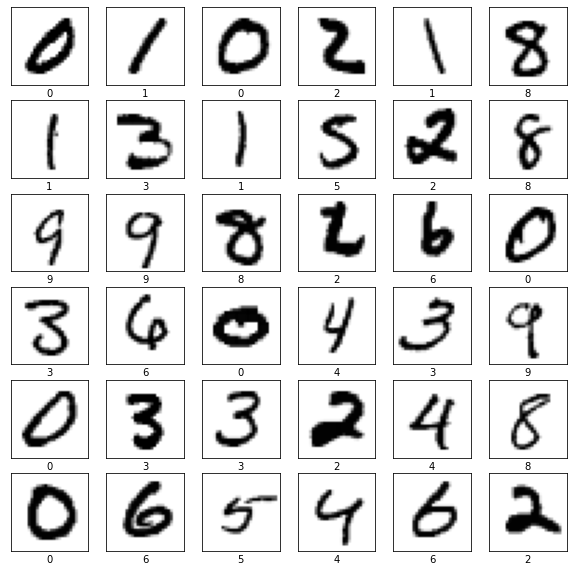

In [12]:
plt.figure(figsize =(10,10))
random_inds = np.random.choice(60000,36)
for i in range (36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]),cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## Fully connected neural network architecture
To define the architecture of this first fully connected neural network, we'll once again use the Keras API and define the model using the Sequential class. Note how we first use a Flatten layer, which flattens the input so that it can be fed into the model.

In this next block, you'll define the fully connected layers of this simple work

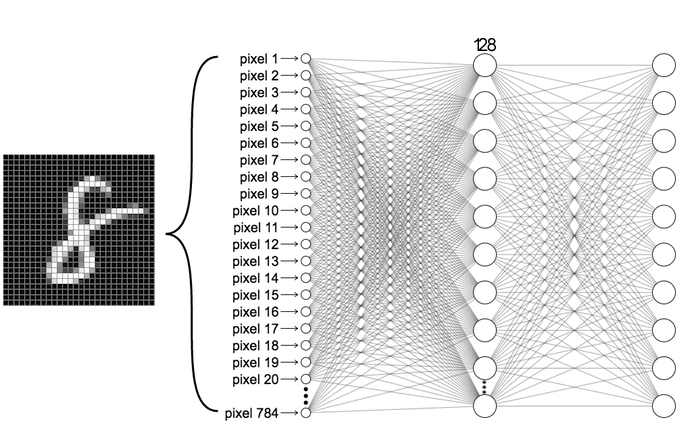

In [13]:
def build_fc_model():
    fc_model = tf.keras.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation = tf.nn.softmax)                             
                                    ])
    return fc_model

In [14]:
model = build_fc_model()

As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. 
**Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model.**

Let's take a step back and think about the network we've just created. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are fully-connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model!

## Compile the model
Before training the model, we need to define a few more settings. These are added during the model's compile step:

**Loss function** — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.

**Optimizer** — This defines how the model is updated based on the data it sees and its loss function.

**Metrics** — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we'll want to use the cross entropy loss.

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model.

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
We're now ready to train our model, which will involve feeding the training data (train_images and train_labels) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training.

In Lab 1, we saw how we can use GradientTape to optimize losses and train models with stochastic gradient descent. After defining the model settings in the compile step, we can also accomplish training by calling the fit method on an instance of the Model class. We will use this to train our fully connected model

In [16]:
# Define the batch size and the number of epochs to use during training
batch_size = 64
epochs = 5

model.fit(train_images,train_labels,batch_size = batch_size, epochs = epochs)

Epoch 1/5
938/938 [==============================] - 1s 746us/step - loss: 0.3693 - accuracy: 0.8970
Epoch 2/5
938/938 [==============================] - 1s 682us/step - loss: 0.1961 - accuracy: 0.9438
Epoch 3/5
938/938 [==============================] - 1s 575us/step - loss: 0.1481 - accuracy: 0.9577
Epoch 4/5
938/938 [==============================] - 1s 671us/step - loss: 0.1200 - accuracy: 0.9657
Epoch 5/5
938/938 [==============================] - 1s 685us/step - loss: 0.1013 - accuracy: 0.9709



As the model trains, the loss and accuracy metrics are displayed. With five epochs and a learning rate of 0.01, this fully connected model should achieve an accuracy of approximatley 0.97 (or 97%) on the training data.

## Evaluate accuracy on the test dataset
Now that we've trained the model, we can ask it to make predictions about a test set that it hasn't seen before. In this example, the test_images array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the test_labels array.

Use the evaluate method to evaluate the model on the test dataset!

In [17]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 389us/step - loss: 0.1097 - accuracy: 0.9681


In [18]:
print("Test Accuracy:", test_acc*100,"%")

Test Accuracy: 96.81000113487244 %



You may observe that the accuracy on the test dataset is a little lower than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting, when a machine learning model performs worse on new data than on its training data.

What is the highest accuracy you can achieve with this first fully connected model? Since the handwritten digit classification task is pretty straightforward, you may be wondering how we can do better...

## 1.3 Convolutional Neural Network (CNN) for handwritten digit classification
As we saw in lecture, convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision, and have achieved near-perfect accuracies on the MNIST dataset. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below:



## Define the CNN model
We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before: you can use keras.layers.Conv2D to define convolutional layers and keras.layers.MaxPool2D to define the pooling layers. Use the parameters shown in the network architecture above to define these layers and build the CNN model.



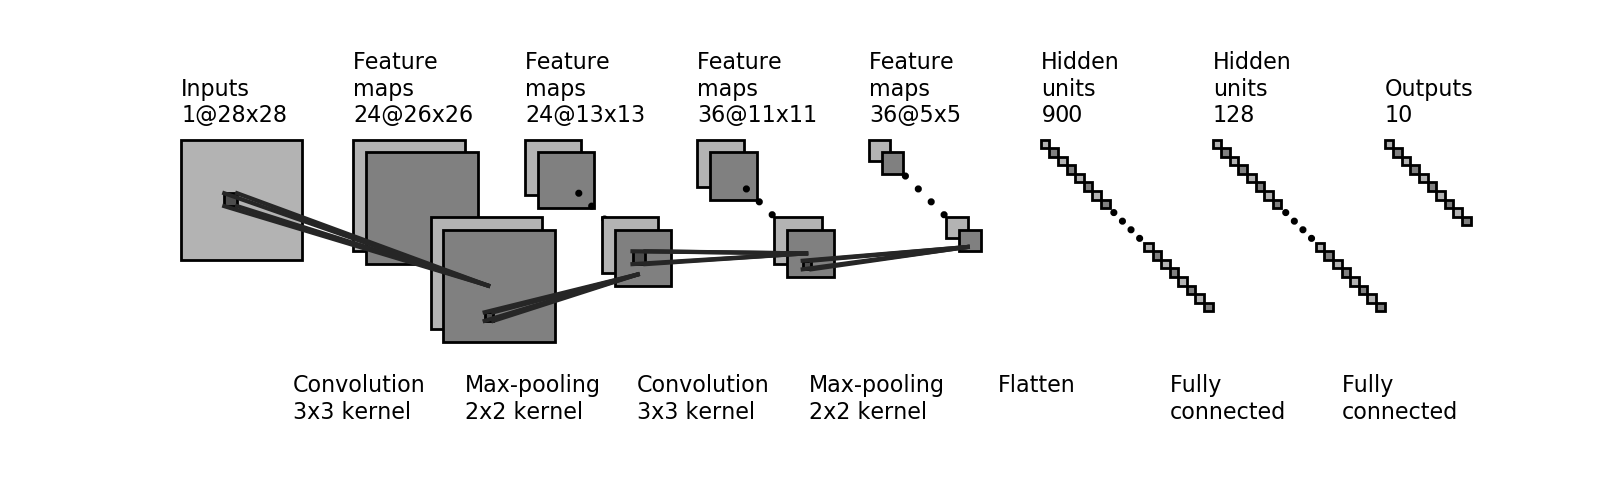

In [19]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters = 24,kernel_size = (3,3),activation = tf.nn.relu),
    
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(filters = 36,kernel_size =(3,3),activation =tf.nn.relu),
        
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
        
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128 , activation = tf.nn.relu),
        
    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
        
                                        ])
    
    return cnn_model

cnn_model = build_cnn_model()

cnn_model.predict(train_images[[0]])

print(cnn_model.summary())
    
    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## Train and test the CNN model
Now, as before, we can define the loss function, optimizer, and metrics through the compile method. Compile the CNN model with an optimizer and learning rate of choice:

In [21]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
                 loss ='sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

As was the case with the fully connected model, we can train our CNN using the fit method via the Keras API.

In [22]:
cnn_model.fit(train_images,train_labels,batch_size=batch_size,epochs=epochs)

Epoch 1/5
938/938 [==============================] - 13s 14ms/step - loss: 0.1845 - accuracy: 0.9470
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0522 - accuracy: 0.9830
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0216 - accuracy: 0.9931



Great! Now that we've trained the model, let's evaluate it on the test dataset using the evaluate method

In [23]:
tets_loss,test_acc = cnn_model.evaluate(test_images,test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9912


In [24]:
print('Test Accuracy :', test_acc*100,"%")

Test Accuracy : 99.11999702453613 %



What is the highest accuracy you're able to achieve using the CNN model, and how does the accuracy of the CNN model compare to the accuracy of the simple fully connected network? What optimizers and learning rates seem to be optimal for training the CNN model?

## Make predictions with the CNN model
With the model trained, we can use it to make predictions about some images. The predict function call generates the output predictions given a set of input samples.

In [46]:
predictions = cnn_model.predict(test_images)

With this function call, the model has predicted the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset:

In [47]:
predictions[0]

array([6.7060233e-09, 8.7514977e-08, 8.0157825e-08, 2.2441779e-06,
       1.3549279e-08, 4.7003215e-09, 3.6850972e-13, 9.9999750e-01,
       2.4068327e-09, 7.7923296e-08], dtype=float32)

As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 digit classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different digits.

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [48]:
prediction = np.argmax(predicitions[0])

print(prediction)

7


So, the model is most confident that this image is a "7". We can check the test label (remember, this is the true identity of the digit) to see if this prediction is correct:

Label of this digit is:  7


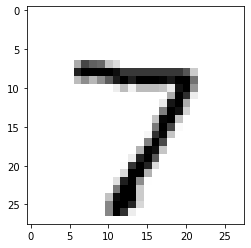

In [49]:
print("Label of this digit is: ", test_labels[0])
plt.imshow(test_images[0,:,:,0] , cmap = plt.cm.binary)

It is! Let's visualize the classification results on the MNIST dataset. We will plot images from the test dataset along with their predicted label, as well as a histogram that provides the prediction probabilities for each of the digits:

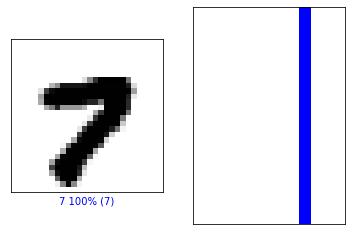

In [50]:
image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)


We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

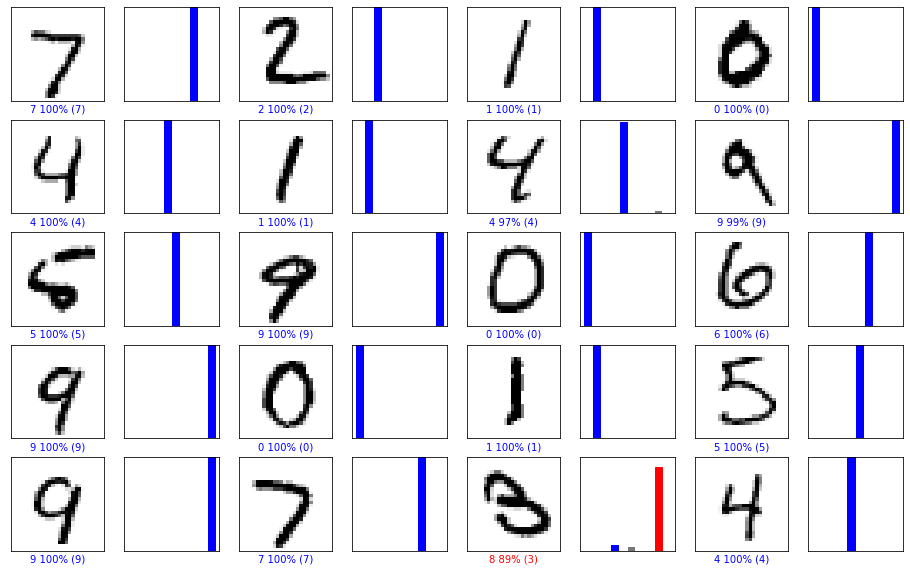

In [51]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    mdl.lab2.plot_value_prediction(i, predictions, test_labels)

## 1.4 Training the model 2.0
Earlier in the lab, we used the fit function call to train the model. This function is quite high-level and intuitive, which is really useful for simpler models. As you may be able to tell, this function abstracts away many details in the training call, and we have less control over training model, which could be useful in other contexts.

As an alternative to this, we can use the tf.GradientTape class to record differentiation operations during training, and then call the tf.GradientTape.gradient function to actually compute the gradients. You may recall seeing this in Lab 1 Part 1, but let's take another look at this here.

We'll use this framework to train our cnn_model using stochastic gradient descent.

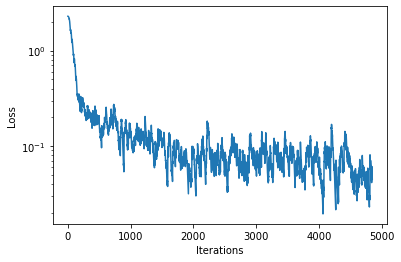

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:02<00:00, 79.58it/s]


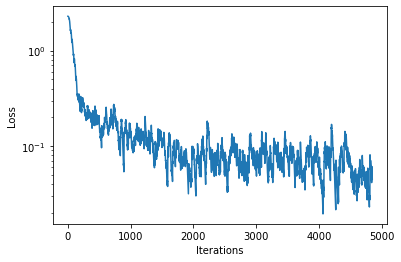

In [52]:

cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists
    
for idx in tqdm(range(0, train_images.shape[0], batch_size)):
        
    (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
        
    images = tf.convert_to_tensor(images, dtype=tf.float32)
        
    with tf.GradientTape() as tape:
            
        logits = cnn_model(images)
    
        loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

    loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
            
    plotter.plot(loss_history.get())
            
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
            
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
            
        
        
        
    
    

    